In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                0.3: "Non-IID partition (α=0.3)", 
                                                })
    # sk = [0, 0.1, 0.01, 0.001]
    # data_temp = data_temp.set_index('Scaling').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "Mean1" in path:
            data["Mode"] += "+M1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "+M2"
            continue
        elif "Mean5" in path:
            data["Mode"] += "+M5"
            continue
        else:
            # continue
            pass
        
        # if "G11" in path and "LR1.2" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR1.2)"
        # elif "G11" in path and "LR1.5" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR1.5)"
        # elif "G11" in path and "LR1.0" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR1.0)"
        # elif "G11" in path and "LR0.8" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR0.8)"
        # elif "G11" in path and "LR0.6" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR0.6)"
        # elif "G11" in path and "LR0.3" in path and "Mean" in path:
        #     data["Mode"] += "+G11 (LR0.3)"
        # elif "G11" in path: continue

        if "gs11L" in path: continue
            # data["Mode"] += "+gs11"
            # continue
        elif "gs12L" in path: 
            continue
        elif "gs21L" in path: continue
        elif "gs22L" in path: continue
        elif "gs31L" in path: 
            data["Mode"] += "+gs31"
            continue
            # continue
        elif "gs32L" in path: 
            data["Mode"] += "+gs32"
            continue
        elif "gs4112L" in path: 
            data["Scaling"] = "x 0.001 (4112)"
        elif "gs4113L" in path: 
            data["Scaling"] = "x 0.001 (4113)"
        elif "gs4114L" in path: 
            data["Scaling"] = "x 0.001 (4114)"
        elif "gs411L" in path: 
            data["Scaling"] = "x 0.01"
            continue
        elif "gs4122L" in path: 
            data["Scaling"] = "x 0.001 (4122)"
        elif "gs4123L" in path: 
            data["Scaling"] = "x 0.001 (4123)"
        elif "gs4124L" in path: 
            data["Scaling"] = "x 0.001 (4124)"
        elif "gs412L" in path: 
            data["Scaling"] = "x 0.001"
        elif "gs414L" in path: 
            data["Scaling"] = "x 0.001 (x1.5)"
            continue
        elif "gs41L" in path: 
            data["Scaling"] = "x 0.1"
            continue
        elif "gs421L" in path: 
            data["Mode"] += "+gs421"
            continue
        elif "gs431L" in path: 
            data["Scaling"] += "+gs431"
            continue
        elif "gs432L" in path: 
            data["Scaling"] += "+gs432"
            continue
        elif "gs41L" in path: 
            data["Mode"] += "+gs41"
            continue
        elif "gs42L" in path: 
            data["Mode"] += "+gs42"
            continue
        elif "gs711L" in path: 
            data["Scaling"] += "+gs711"
            continue
        elif "gs712L" in path: 
            data["Scaling"] += "+gs712"
            continue
        elif "gs713L" in path: 
            data["Scaling"] += "+gs713"
            continue
        elif "gs715L" in path: 
            data["Scaling"] += "+gs715"
            continue
        elif "gs716L" in path: 
            data["Scaling"] += "+gs716"
            continue
        elif "gs717L" in path: 
            data["Scaling"] += "+gs717"
            continue
        elif "gs714L" in path: 
            # data["Scaling"] += "+gs714"
            continue
        elif "gs811L" in path: 
            data["Scaling"] += "+gs811"
            continue
        elif "gs821L" in path: 
            data["Scaling"] += "+gs821"
            continue
        elif "gs" in path:
            continue
        # elif "gs61L0.01L0.1" in path: 
        #     data["Scaling"] = "gs61L0.01L0.1"
        # elif "gs61L0.01L0.01" in path: 
        #     data["Scaling"] = "gs61L0.01L0.01"
        # elif "gs61L0.01L0.001" in path: 
        #     data["Scaling"] = "gs61L0.01L0.001"

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

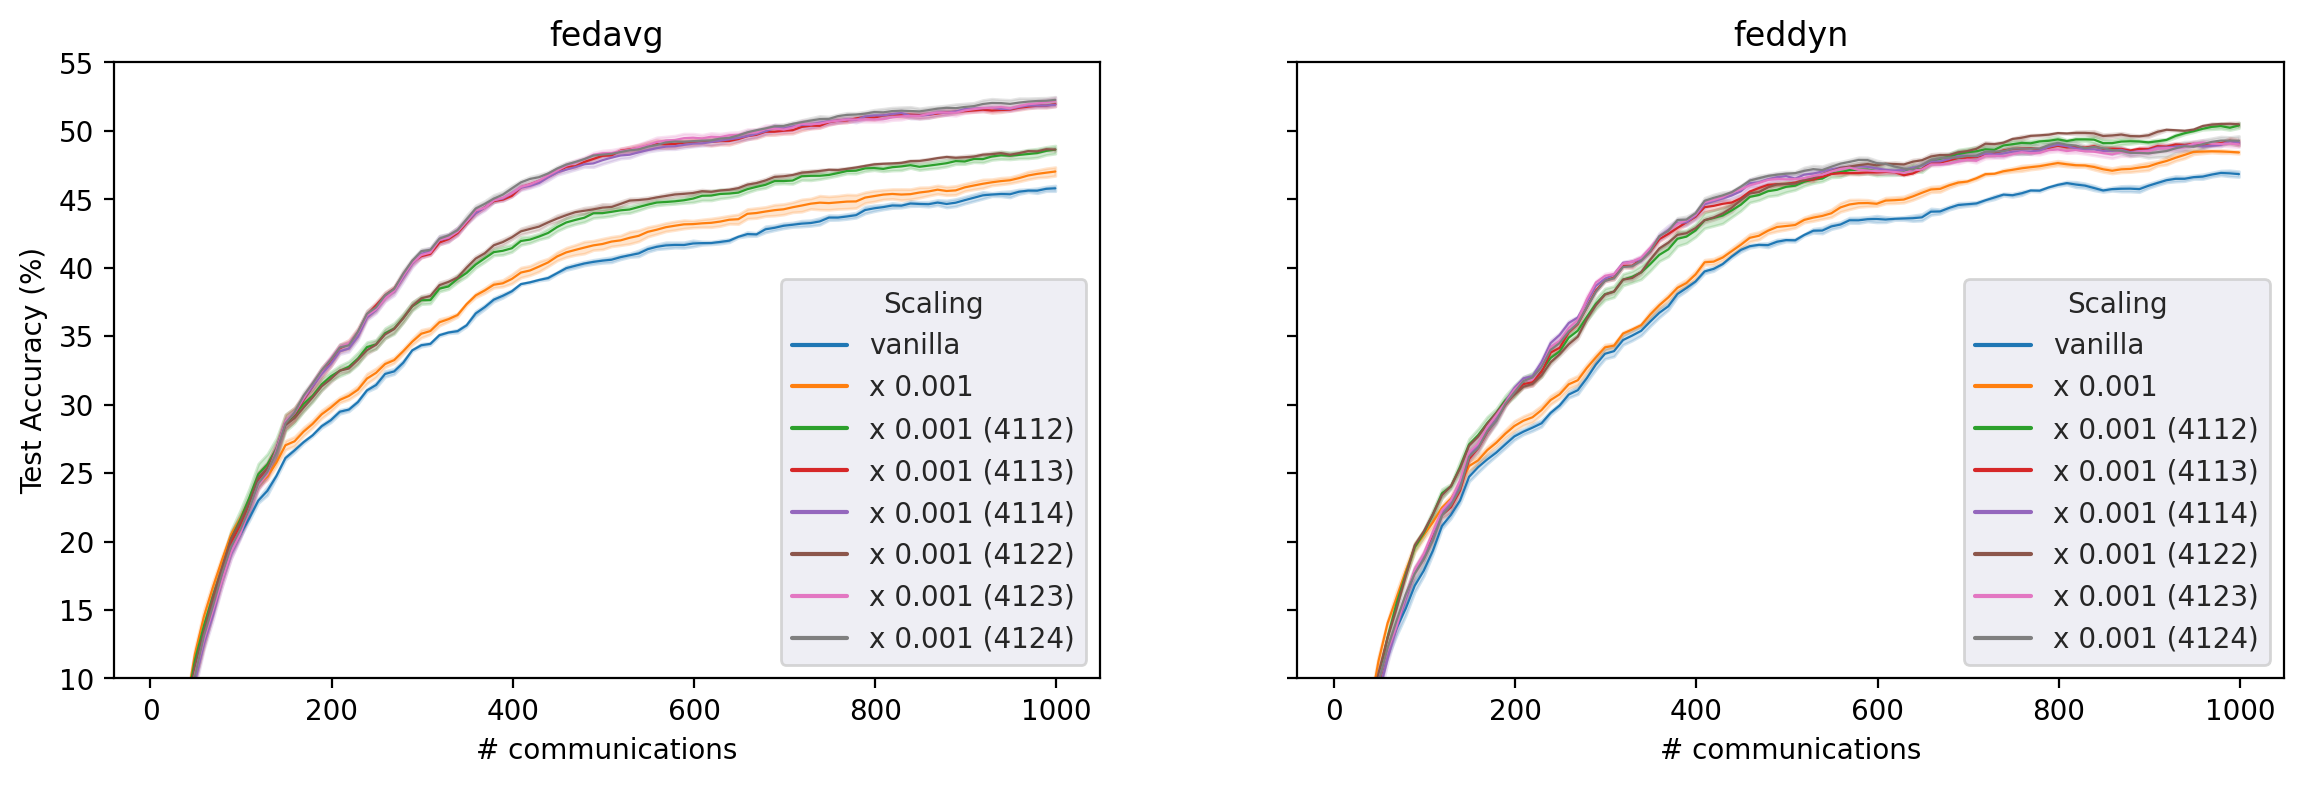

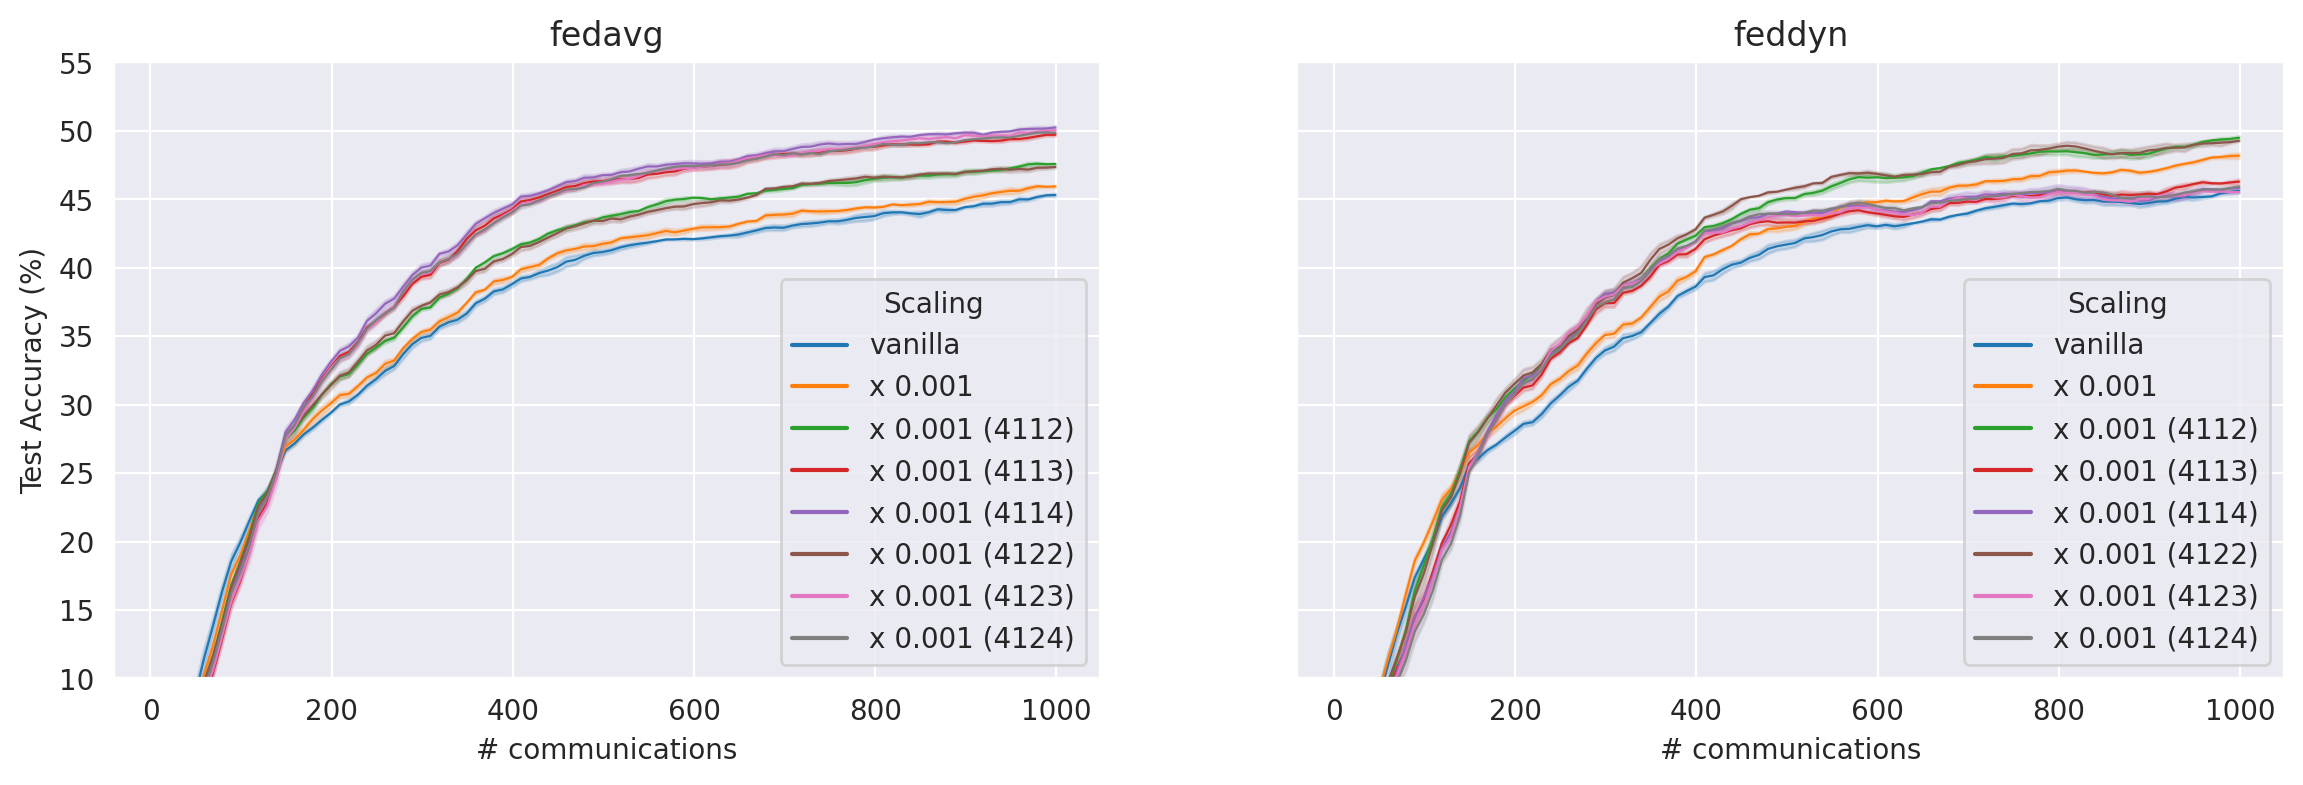

In [4]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

for iid, _ in zip([0., 0.3], range(2)):
    fig, axes = plt.subplots(1, 2, figsize=(14,4), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name in zip(range(2), ["fedavg", "feddyn"]):
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        sk = ["vanilla", "x 0.001", "x 0.001 (4112)", "x 0.001 (4113)", "x 0.001 (4114)", "x 0.001 (4122)", "x 0.001 (4123)", "x 0.001 (4124)"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([10,55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        ax.set_xlabel("# communications")
    plt.pause(0.1)

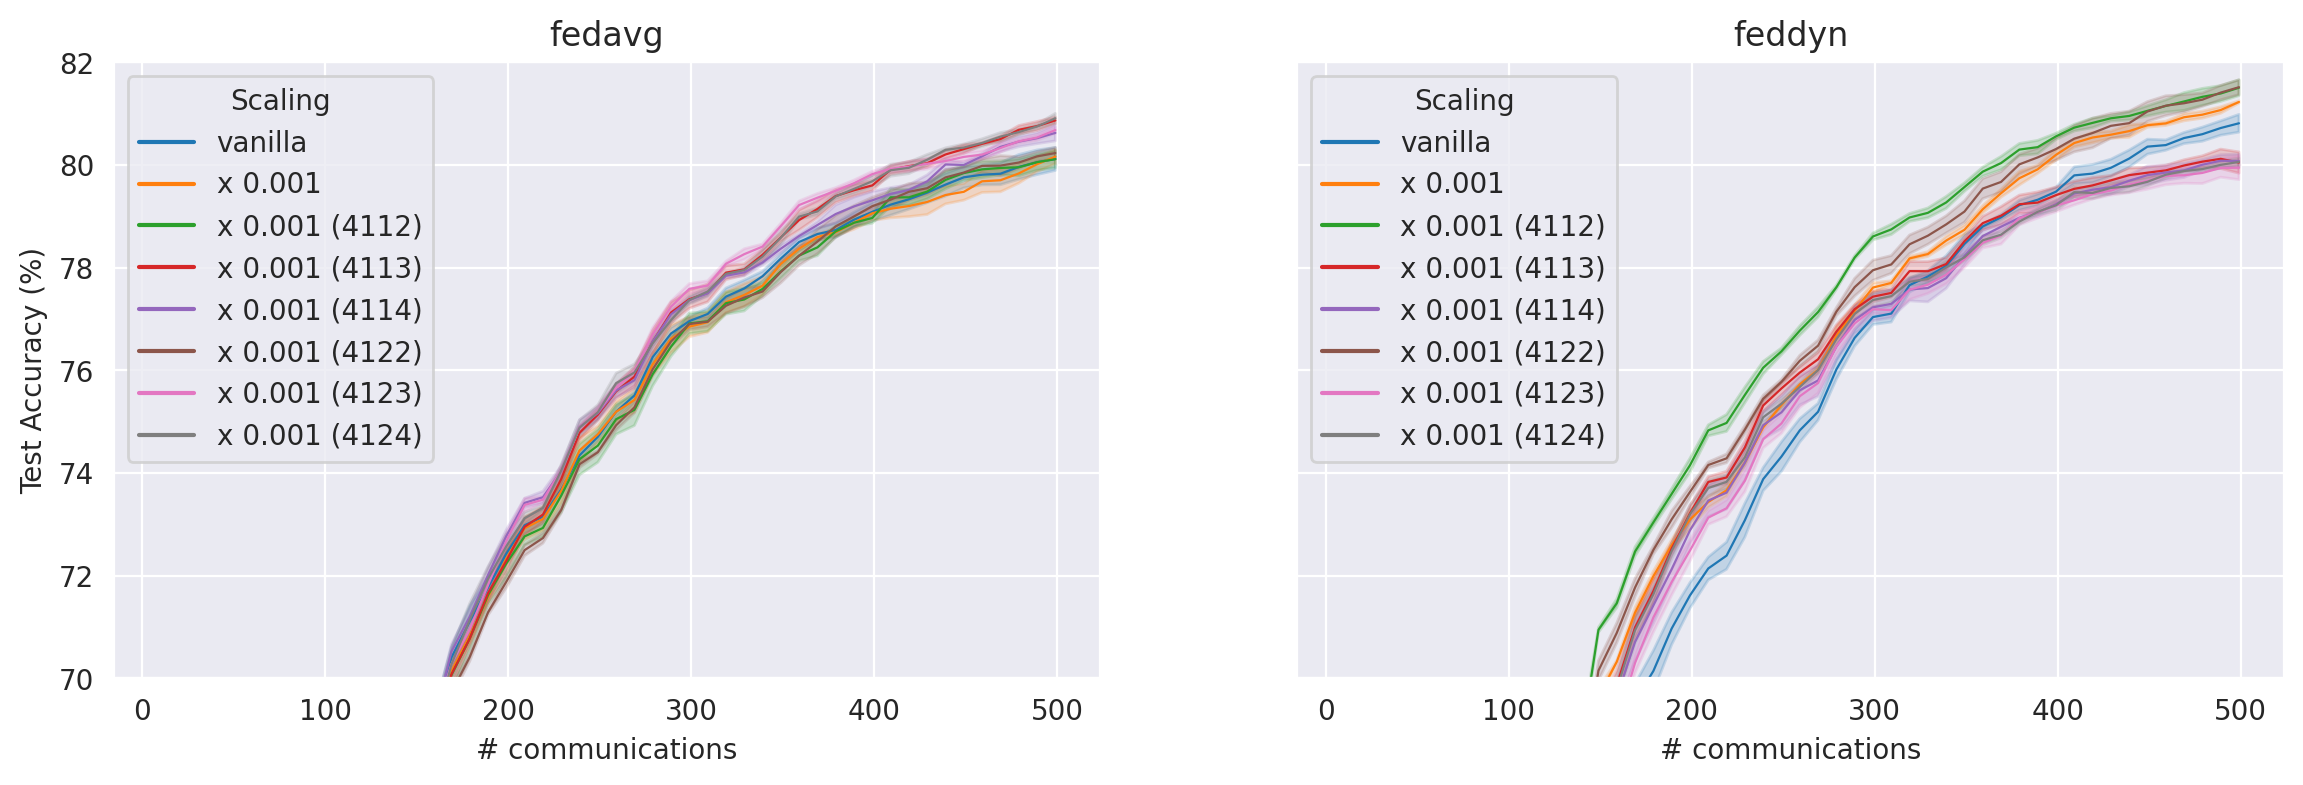

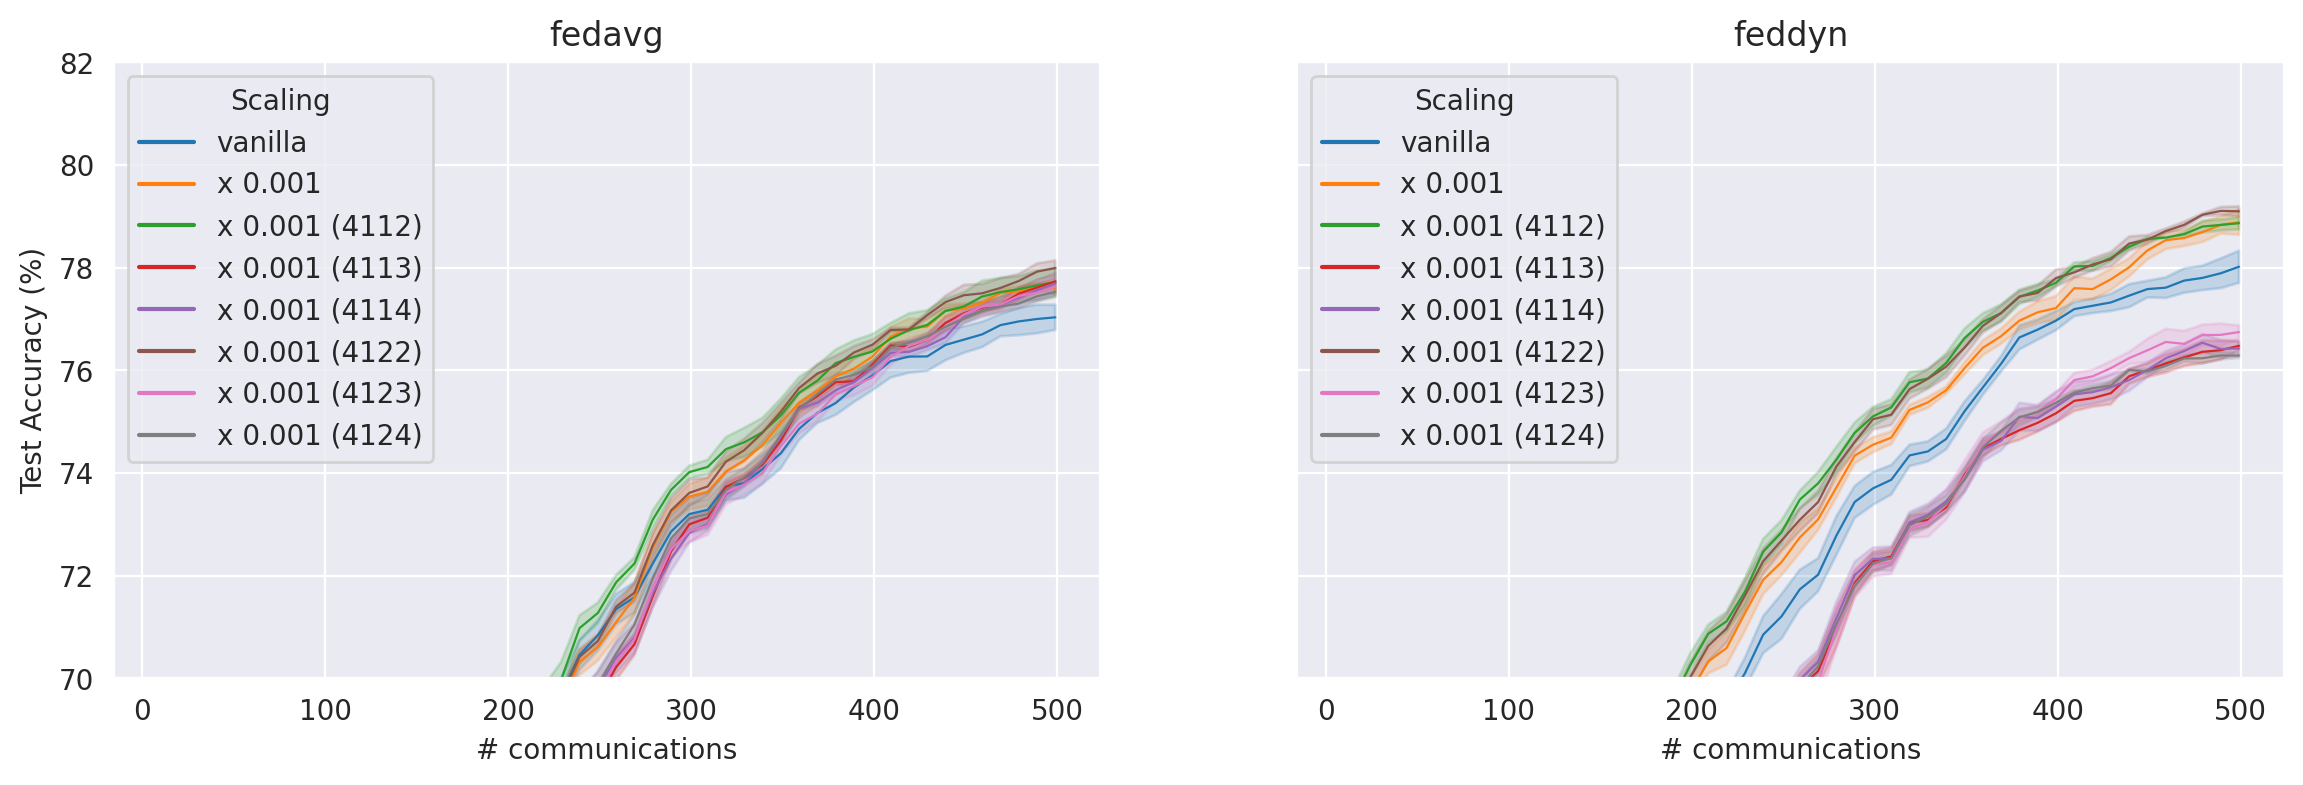

In [5]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

for iid, _ in zip([0., 0.3], range(2)):
    fig, axes = plt.subplots(1, 2, figsize=(14,4), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name in zip(range(2), ["fedavg", "feddyn"]):
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 499]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        sk = ["vanilla", "x 0.001", "x 0.001 (4112)", "x 0.001 (4113)", "x 0.001 (4114)", "x 0.001 (4122)", "x 0.001 (4123)", "x 0.001 (4124)"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([70,82])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        ax.set_xlabel("# communications")
    plt.pause(0.1)